In [1]:
import pandas as pd

In [2]:
loans = pd.read_csv("loan/loan.csv", engine="python")

In [3]:
# Get the shape of dataframe
loans.shape

(39717, 111)

In [4]:
#Find the column which is unique
loans["id"].unique().size

39717

In [5]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data cleaning

In [6]:
#Find the percentage of null values in each column
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
# Drop columns with missing percentage >= 80
loans = loans.dropna(thresh=loans.shape[0]*(1-0.8),axis=1)

In [8]:
#Find the percentage of null values in each column
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
#Drop rows which has more than 80% of columns empty
loans = loans.dropna(thresh=loans.shape[1]*(1-0.8),axis=1)

In [10]:
# emp_title has 6% null values , since it is very less i may drop it or impute it with mode as it is non numberical values. 
# Since this is also not a very critical column i will drop this column.

loans["emp_title"].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [11]:
loans = loans.drop(["emp_title"],axis=1)

In [12]:
loans["emp_length"].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [13]:
# emp_length has 2% null values so will drop the rows where emp_length is null as it could be a critical column
loans = loans[~pd.isnull(loans['emp_length'])]

In [14]:
# convert employee lenght to float as it is cannot be string
loans["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [15]:
# Assumption #1 if an employee has 10+ years of expereience then we will assume him having 10 years
# Assumption #2 if an empoyee is having < 1 year we will assume him to have 1 year exp
# Assumption #3 for all the other row pick the 1st char as it is the number of years of exp.

loans["emp_length"] = loans["emp_length"].apply(lambda x: int(10) if x == '10+ years' else int(1) if x == '< 1 year' else int(x[0]))

In [16]:
# desc column wont effect our analysis much so will drop the columns and it has 32% null values
loans = loans.drop(["desc"],axis=1)

In [17]:
#Find the percentage of null values in each column
round(100*(loans.isnull().sum()/len(loans.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.57
open_acc                    

In [18]:
# Remove columns which are related t customer behaviour in existing loan as these are not available from loan application we 
# should drop them
# Columns which are related to data which will be known only after loan is approved also can be dropped.

loans = loans.drop(["delinq_2yrs","earliest_cr_line","funded_amnt","funded_amnt_inv","inq_last_6mths",
            "last_credit_pull_d","last_pymnt_amnt","last_pymnt_d","out_prncp","out_prncp_inv",
           "total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp","collection_recovery_fee",
           "collections_12_mths_ex_med","revol_bal","mths_since_last_delinq","revol_util","open_acc","pub_rec",
                   "total_acc","recoveries"],axis=1)


In [19]:
#title will also not effect our analysis as we already have purpose columns similar to this. So will drop this.
loans = loans.drop(["title"],axis=1)

In [20]:
# As only .14% of rows have this as null so will drop those rows since it wont effect the analysis
##  TBD Need to be remoeved
loans = loans[~pd.isnull(loans["chargeoff_within_12_mths"])]

In [21]:
# As > 2% so dropping the rows with this column as null
loans = loans[~pd.isnull(loans["pub_rec_bankruptcies"])]

In [22]:
# Drop all the below columns as all are having same values so wont be applicable for analysis
loans = loans.drop(["application_type","initial_list_status","policy_code","acc_now_delinq","tax_liens","pymnt_plan"],axis=1)

In [23]:
# Loan status current are neither fully paid or defaulted so remove them as they are not useful for analysis
loans = loans[loans["loan_status"] != "Current"]

In [24]:
# Zip code is also not going to help us in any analysis so drop those rows

loans = loans.drop(["zip_code"],axis=1)

In [32]:
loans["int_rate"].describe()

count      36845
unique       335
top       10.99%
freq         891
Name: int_rate, dtype: object

In [34]:
# Convert int rate as float
loans["int_rate"] = loans["int_rate"].apply(lambda x: float(x[:-1]))

In [44]:
loans["issue_d"].describe()

count      36845
unique        51
top       Dec-11
freq        1994
Name: issue_d, dtype: object

In [66]:
# Extract month from issue date for analysis
loans["issue_month"] = pd.to_datetime(loans["issue_d"], format='%b-%y').dt.month_name().str.slice(stop=3)

In [70]:
# Convert Fully Paid as 0 and Charged off as 1 for easy analysis
loans["loan_status"] = loans["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [74]:
# url will not be helpfull in this case for any analysis so dropping this column.
loans = loans.drop(["url"],axis=1)

In [82]:
loans["chargeoff_within_12_mths"].value_counts()

0.0    36845
Name: chargeoff_within_12_mths, dtype: int64

In [84]:
# chargeoff_within_12_mths has only same value which 0.0 so dropping this column.
loans = loans.drop(["chargeoff_within_12_mths"],axis=1)

In [86]:
loans["delinq_amnt"].value_counts()

0    36845
Name: delinq_amnt, dtype: int64

In [87]:
# delinq_amnt has only same value which 0.0 so dropping this column.
loans = loans.drop(["delinq_amnt"],axis=1)

In [128]:
loans["term"] = loans["term"].apply(lambda x: x.strip()[0:2])

In [90]:
loans["pub_rec_bankruptcies"].value_counts()

0.0    35312
1.0     1528
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [92]:
loans.shape

(36845, 19)

### Check for outlier

In [93]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36845 entries, 0 to 39623
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36845 non-null  int64  
 1   member_id             36845 non-null  int64  
 2   loan_amnt             36845 non-null  int64  
 3   term                  36845 non-null  object 
 4   int_rate              36845 non-null  float64
 5   installment           36845 non-null  float64
 6   grade                 36845 non-null  object 
 7   sub_grade             36845 non-null  object 
 8   emp_length            36845 non-null  int64  
 9   home_ownership        36845 non-null  object 
 10  annual_inc            36845 non-null  float64
 11  verification_status   36845 non-null  object 
 12  issue_d               36845 non-null  object 
 13  loan_status           36845 non-null  int64  
 14  purpose               36845 non-null  object 
 15  addr_state         

In [157]:
import seaborn as sns
import numpy as np

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

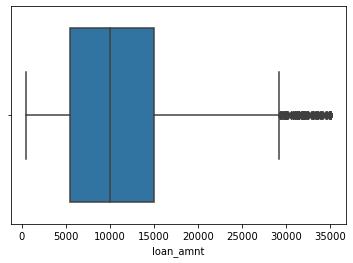

In [95]:
# For loan amount
sns.boxplot(loans["loan_amnt"])

#### As there are good number of loan amount above the upper limit in box plot we can ignore this as it doesnt seems to be outlier

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

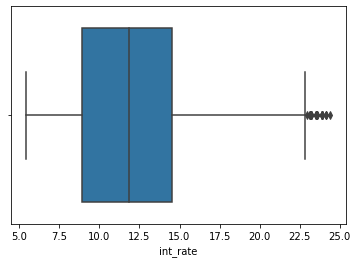

In [99]:
# For interest rate
sns.boxplot(loans["int_rate"])

In [100]:
loans[loans["int_rate"] > 22.5]

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month
223,1060644,1292408,24250,60 months,23.91,519.76,G,G4,7,MORTGAGE,120000.00,Verified,Dec-11,0,debt_consolidation,AZ,12.96,0.0,Dec
601,1058624,1290219,12375,60 months,23.13,349.79,G,G2,5,RENT,40000.00,Not Verified,Dec-11,1,other,FL,20.88,0.0,Dec
616,1061914,1293952,22400,60 months,22.74,628.13,G,G1,6,RENT,85000.00,Not Verified,Dec-11,1,credit_card,NY,7.02,0.0,Dec
733,1060753,1292527,24925,60 months,23.91,715.75,G,G4,4,RENT,60000.00,Verified,Dec-11,0,credit_card,FL,17.74,0.0,Dec
1156,1055225,1286781,29100,60 months,23.91,835.63,G,G4,1,RENT,95000.00,Source Verified,Dec-11,0,debt_consolidation,NY,16.41,0.0,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13489,741724,939706,15000,60 months,22.94,322.39,F,F5,3,RENT,60000.00,Source Verified,Jun-11,1,debt_consolidation,MA,19.28,0.0,Jun
13492,774690,976878,12000,60 months,24.40,348.01,G,G4,7,RENT,35775.63,Not Verified,Jun-11,1,renewable_energy,NY,12.98,0.0,Jun
14089,737936,935204,21600,60 months,22.85,607.06,G,G3,10,MORTGAGE,94000.00,Verified,Jun-11,1,debt_consolidation,NJ,18.79,0.0,Jun
14600,763262,963821,35000,60 months,23.59,851.64,G,G5,4,RENT,100000.00,Verified,Jun-11,0,debt_consolidation,AZ,22.28,0.0,Jun


In [111]:
loans[loans["grade"] == 'G']["int_rate"].describe()

count    296.000000
mean      21.333007
std        1.282267
min       18.720000
25%       20.170000
50%       20.900000
75%       22.480000
max       24.400000
Name: int_rate, dtype: float64

In [112]:
loans[loans["grade"] == 'F']["int_rate"].describe()

count    944.000000
mean      19.697479
std        1.404811
min       15.760000
25%       18.430000
50%       19.410000
75%       20.915000
max       22.940000
Name: int_rate, dtype: float64

### For grade F and G there is a possiblity of high interest rate so the given rates are not outlier and seems valid

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='installment'>

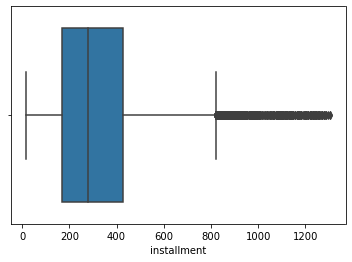

In [113]:
# For installment
sns.boxplot(loans["installment"])

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='installment'>

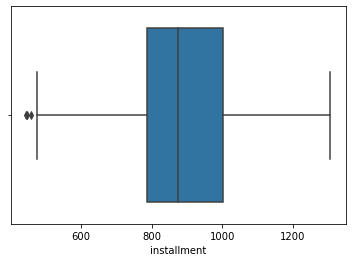

In [133]:
loans[loans["loan_amnt"] >  30000]["installment"].describe()

sns.boxplot(loans[loans["loan_amnt"] >  30000]["installment"])

In [135]:
loans[loans["loan_amnt"] >  30000]["installment"].describe()

count     720.000000
mean      893.680778
std       195.065629
min       444.540000
25%       786.010000
50%       875.815000
75%      1002.232500
max      1305.190000
Name: installment, dtype: float64

#### Installment also doesnt have any outlier , those which are coming outside the lower and upper limit has higher term or lower interest rate so we can retain them

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

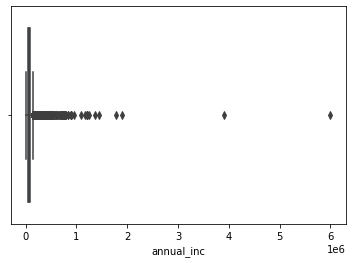

In [141]:
# For annual_inc
sns.boxplot(loans["annual_inc"])

In [145]:
loans["annual_inc"].describe()

count    3.684500e+04
mean     6.940618e+04
std      6.402879e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Annual inc also doesnt have outliers as mean and median are almost same

C:\Users\Supran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

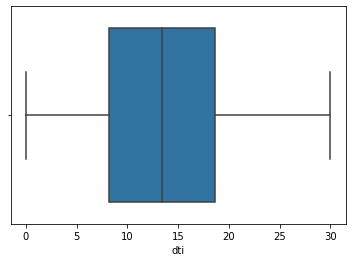

In [149]:
# For dti
sns.boxplot(loans["dti"])

In [191]:
loans.shape

(36845, 19)

## Data analysis

<AxesSubplot:xlabel='term'>

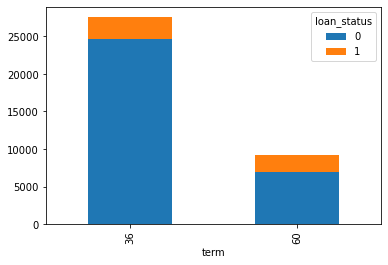

In [161]:
# Find the defauling rate based on term 36 and 60 months
loans.groupby("term")["loan_status"].value_counts().unstack().plot(kind='bar',stacked=True)

#### As seen above for 60 months term chances of defaulting is more but need to check if there is any other driver here since data points for 60 months are very less 

<AxesSubplot:xlabel='sub_grade'>

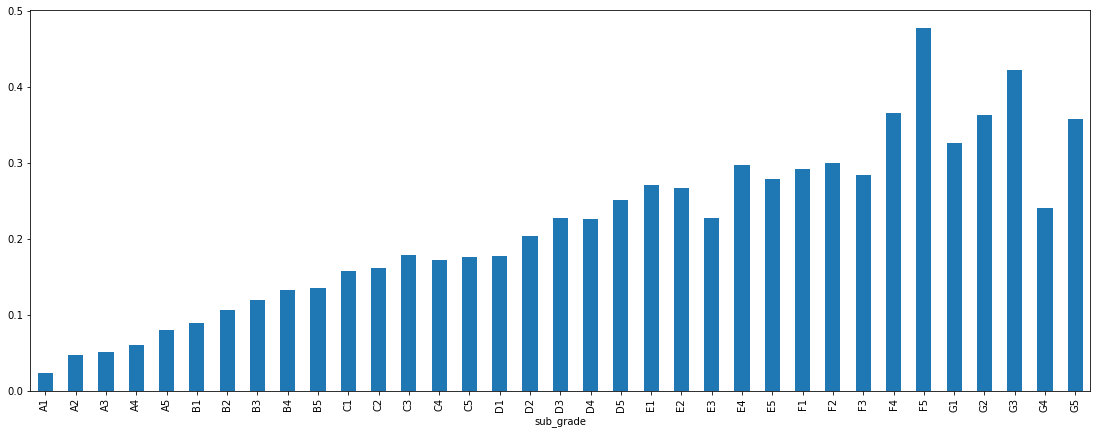

In [190]:
# Find defaulting rate based on grade and subgrade
result = loans.groupby("sub_grade").apply(lambda x: x["loan_status"].sum()/x["loan_status"].count())
result.plot.bar(figsize=(19,7))

